#  Salary_hike -> Build a prediction model for Salary_hike


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sal=pd.read_csv("D:/Datasets/Salary_Data.csv")
sal.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
sal.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
sal.shape

(30, 2)

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
sal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4F2745488>,
      dtype=object)

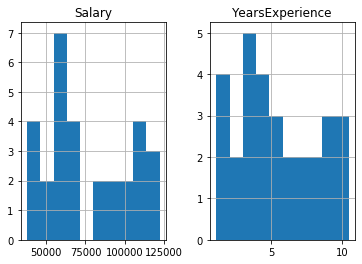

In [7]:
sal.hist()

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

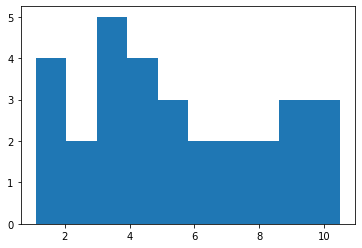

In [8]:
plt.hist(sal["YearsExperience"])

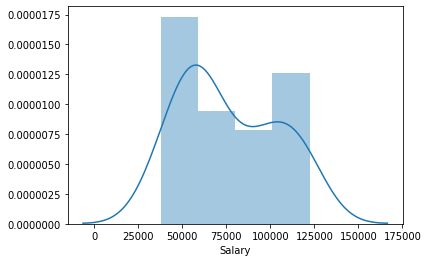

In [9]:
sns.distplot(sal['Salary'])

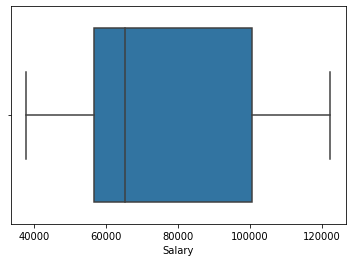

In [10]:
sns.boxplot(sal['Salary'])

In [11]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
import statsmodels.formula.api as smf
M1=smf.ols('Salary~YearsExperience',data=sal).fit()
type(M1)
print(M1.params)
M1.summary()

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.14e-20
Time:                        09:32:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
M1.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [14]:
pred=M1.predict(sal)
resid=pred-sal["Salary"]
df=pd.DataFrame({"Actual":sal.Salary,"Prediction":pred})
df

,Actual,Prediction
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sal.Salary,pred)#RMSE = 31270951.72228097

31270951.72228097

# Delivery_time -> Predict delivery time using sorting time 

In [16]:
Del=pd.read_csv("D:/Datasets/delivery_time.csv")
Del

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [17]:
Del.shape

(21, 2)

In [18]:
Del.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [19]:
Del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [20]:
Del.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


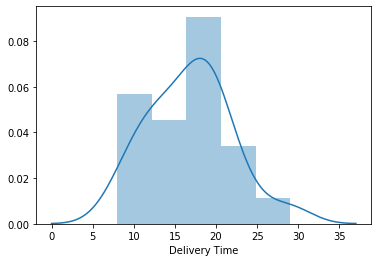

In [21]:
sns.distplot(Del['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

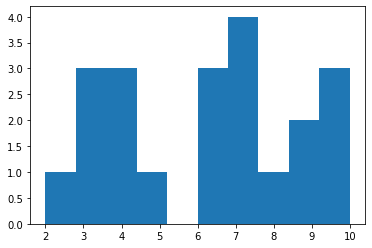

In [22]:
plt.hist(Del['Sorting Time'])

In [23]:
Del.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [24]:
Del.rename(columns={"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"},inplace=True)
Del

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
import statsmodels.formula.api as smf
M2=smf.ols("DeliveryTime~SortingTime",data=Del).fit()
print(M2.params)
print(M2.summary())

Intercept      6.582734
SortingTime    1.649020
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 08 May 2022   Prob (F-statistic):           3.98e-06
Time:                        09:32:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [26]:
M2.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
SortingTime,1.108673,2.189367


In [27]:
del_pred=M2.predict(Del)
df2=pd.DataFrame({"Actual":Del.DeliveryTime,"Prediction":del_pred})
df2

,Actual,Prediction
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Del.DeliveryTime,del_pred)

7.793311548584063